
# Project: Investigate a Dataset (TMDb_Movies Dataset)¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> in order to complete the project i will be using TMDb movie data.


>This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
it consists of 21 columns:
* movie_id
* imdb_id 
* cast 
* director
* budget 
*  genre
*  homepage 
*  id 
*  keywords 
*  original_title 
*  overview
*  popularity 
*  production
*  release_date
*  revenue
*  runtime
*  tagline
*  vote_average
*  budget_adj 
*  revenue_adj




### Question(s) for Analysis
> 1. do movies with higher budgets get higher ratings/popularity?
> 2. what are the top 10 production companies of the most profitable movies?
> 3. what is the most common genre over time?
> 4. which attributes are associated with the runtime of the movies?
> 5. what cast has the most movies?


start by importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
>after adressing the questions regarding this data, the next step is gathering, assesing and cleaning the data.

### General Properties
let's read the data and see what we got

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

# observations
>1. since the unit of currency is not specified i will assume it's in US dollars.
>2. popularity of the movies doesnt necesserly depend on the value counts.
>3. there are irrelevant data that will need to be droped. 
>4. there are 10866 samples.

### let's invistigate further!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

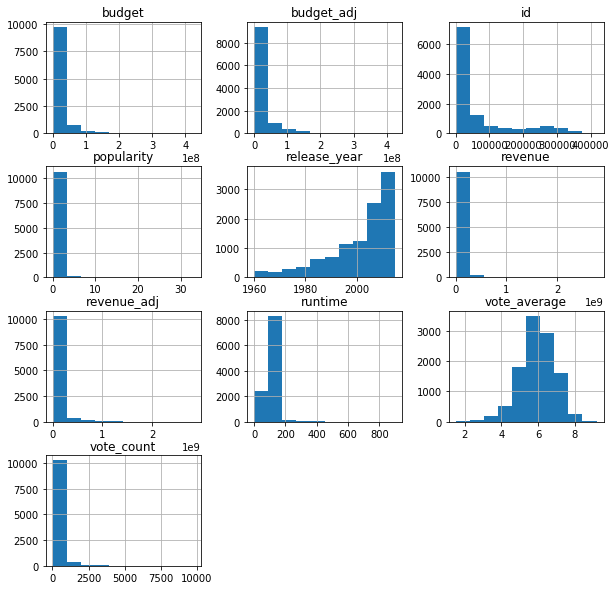

In [6]:
df.hist(figsize = (10,10));

#### lets see what we got here
>1. the 'id'and 'imdb_id' columns are not both needed one id is enough, so i'll drop one.
>2. the columns 'tagline' , 'overview' , 'homepage' , 'keywords' ,'vote_count',are not needed so they'll be dropped
>3. the columns 'budget_adj' and 'revenue_adj' are unused since the currency is unknown so will also be dropped.
>4. some columns have missing values.
>5. some dataypes will need adjustment.
>6. a histogram of each variable 
   
  


### Time to check for duplicates and null values

In [7]:
df.duplicated().sum()

1

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Now to take care of that
>### it's cleaning time!


## Data Cleaning
> so in this section i'll try to:
+ remove the duplicated values in rows 
+ delete the unused data from the dataframe
+ drop the rows that conain missing values
+ change the release date fromate to datetime format
+ discard entries that has zero values in the budget or revenue columns
+ dropped zero values in runtime column
+ adjust the budget and revenue datatypes
 

>### removing duplicated values 

In [9]:
#show duplicates
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
#drop duplicates
df.drop_duplicates(inplace = True)

    let's check if that worked

In [11]:
df.duplicated().sum()

0

    great! 
>### now to drop the unused columns

In [12]:
df.drop(['imdb_id', 'tagline' , 'overview' , 'homepage' , 'keywords','budget_adj', 'revenue_adj'], axis = 1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [14]:
df.shape

(10865, 14)

>### dropping the null values

In [15]:
#count null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [16]:
df.dropna(how = 'any',inplace = True)


     let's see how this turned out

In [17]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


>### Change the 'relase_date' column from string to datetime

In [19]:
df['release_date']= pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

>### Drop the zero values in runtime 

i noticed some of the values in runtime are zero, let's check

In [20]:
runtime_zero = df['runtime'] == 0
df[runtime_zero].shape , df[runtime_zero].index.values

((13, 14),
 array([  92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934]))

these are a lot, lets take a closer look

In [21]:
df[runtime_zero]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014
3329,20414,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,Carlo Verdone,0,Family,Filmauro,2008-03-07,35,5.3,2008
3857,289097,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,Stephen Kay,0,Horror,Access Motion Pictures,2011-06-10,13,5.2,2011
4944,158150,0.026459,0,0,How to Fall in Love,Brooke D'Orsay|Eric Mabius|Jody Thompson|Gina ...,Mark Griffiths,0,Comedy|Romance|TV Movie,Annuit Coeptis Entertainment Inc.|Annuit Coept...,2012-07-21,11,4.7,2012
5695,224815,0.417739,0,0,Skinwalker Ranch,Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...,Devin McGinn,0,Thriller|Horror|Science Fiction,DeepStudios,2013-10-30,27,4.3,2013


Since almost all of the zero rutime values also has zero budget and revenue values then better off dropping them

In [22]:
df.drop(labels = [  92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934], inplace = True)

In [23]:
df[runtime_zero]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
id                      9759 non-null int64
popularity              9759 non-null float64
budget                  9759 non-null int64
revenue                 9759 non-null int64
original_title          9759 non-null object
cast                    9759 non-null object
director                9759 non-null object
runtime                 9759 non-null int64
genres                  9759 non-null object
production_companies    9759 non-null object
release_date            9759 non-null datetime64[ns]
vote_count              9759 non-null int64
vote_average            9759 non-null float64
release_year            9759 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [25]:
df.shape

(9759, 14)

looks like it worked! we still need to get red of the rest of zero values in budget and revenue column though


>### removing zeros in budget an revenue columns with using NAN

In [26]:
#creat a seperate list
new_list = ['budget','revenue','runtime']

df[new_list] = df[new_list].replace(0, np.NAN)
df.dropna(subset = new_list , inplace = True)
df.shape

(3805, 14)

as we can see the number of movies is now 3805 

>### change the datatype of budget and revenue columns

first we check their current datatype again

In [27]:
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [28]:
type_list = ['budget', 'revenue']
df[type_list] = df[type_list].astype('int64')
df[type_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 2 columns):
budget     3805 non-null int64
revenue    3805 non-null int64
dtypes: int64(2)
memory usage: 89.2 KB


great!! Now up to the next stage

<a id='eda'></a>
## Exploratory Data Analysis

> Now time to get to the main point


### Question 1 (do movies with higher budgets get higher rating/popularity?)

we will use a bar plot to make a proper visualization

In [29]:
median = df['budget'].median()
high_budget = df.query('budget >= {}'.format(median))
low_budget = df.query('budget < {}'.format(median))

high = high_budget['vote_average'].mean()
low = low_budget['vote_average'].mean()

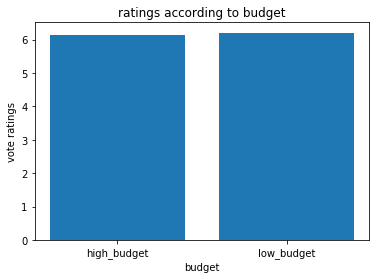

In [30]:
labels = ['high_budget', 'low_budget']
locations = [1,2]
heights = [high, low]
plt.bar(locations, heights, tick_label = labels)
plt.xlabel('budget')
plt.ylabel('vote ratings')
plt.title('ratings according to budget');



theres barely a difference, lets check the directrelation between ratings and budget

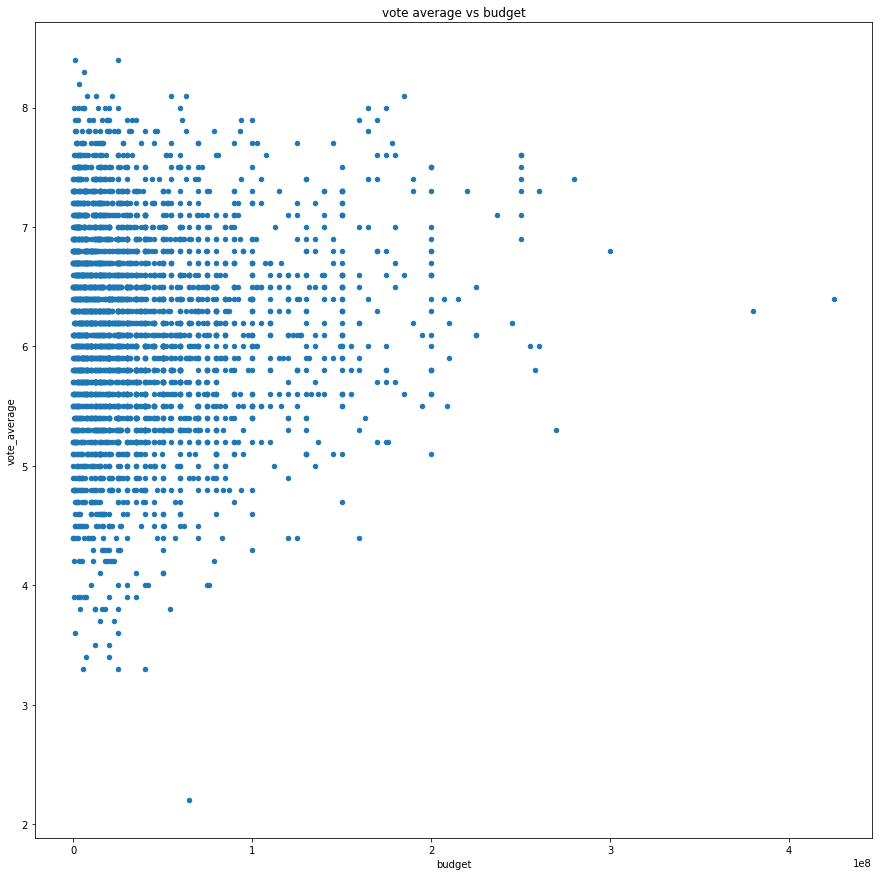

In [75]:
df.plot(x='budget', y='vote_average', kind = 'scatter', figsize = (15,15));
plt.title('vote average vs budget');

 theres a slight postive correlation means that higher budgets get higher ratings therefor movies with higher budgets get higher votes but there are high rated movies that has low budget so theres not a reliable assosiation between these variables

In [33]:
median = df['budget'].median()
high_budget = df.query('budget >= {}'.format(median))
low_budget = df.query('budget < {}'.format(median))

high = high_budget['popularity'].mean()
low = low_budget['popularity'].mean()

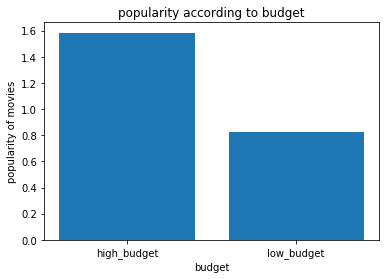

In [34]:
labels = ['high_budget', 'low_budget']
locations = [1,2]
heights = [high, low]
plt.bar(locations, heights, tick_label = labels)
plt.xlabel('budget')
plt.ylabel('popularity of movies')
plt.title('popularity according to budget');

 as we see from the bar plot the higher budget movies are more popular.
let's check the relation between popularity and ratings

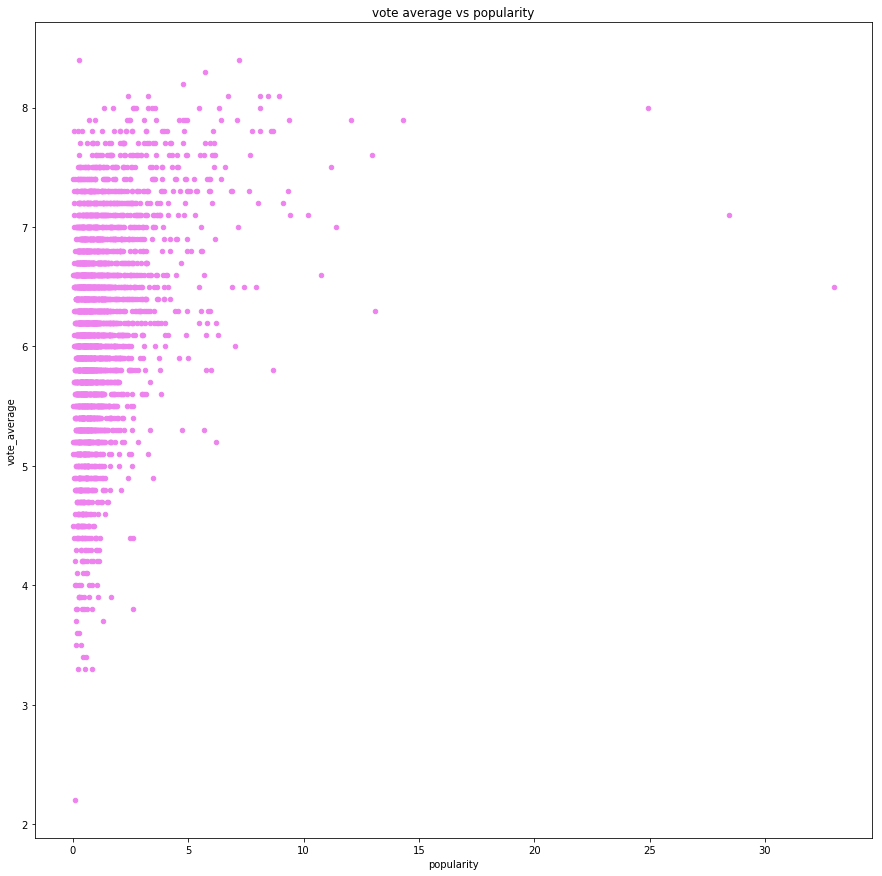

In [74]:
df.plot(x='popularity', y='vote_average', kind = 'scatter', color = 'violet', figsize = (15,15));
plt.title('vote average vs popularity');


seems like those two variables are highly positvely correlated we could say an assosiation exists!

### Question 2 (what are the top 10 companies with the most profitable movies?)

since we dont have a column for profits ill insert one

In [47]:
df.insert(2,'profits',df['revenue']-df['budget'])

let's see how this worked

In [48]:
df.head(1)

,id,popularity,profits,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


great! now we answer the question

In [49]:
prod_comp = df.groupby('production_companies').mean().profits

In [50]:
prod_comp

production_companies
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions                                                          -4.376180e+06
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions                             1.377000e+03
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III                             8.457875e+07
1492 Pictures|Warner Bros.|Heyday Films                                                                                      8.514756e+08
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG                                                    7.766885e+08
1492 Pictures|Warner Bros.|Heyday Films|P of A Productions Limited                                                           6.598046e+08
1818|Lone Wolf McQuade Associates|Topkick Productions                                                                        7.232628e+06
20th Century 

In [51]:
#using sort 
sort_comp = prod_comp.sort_values(ascending = False)
sort_comp.head()

production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.544506e+09
Lucasfilm|Truenorth Productions|Bad Robot                                                                     1.868178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            1.645034e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1.363529e+09
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                   1.316249e+09
Name: profits, dtype: float64

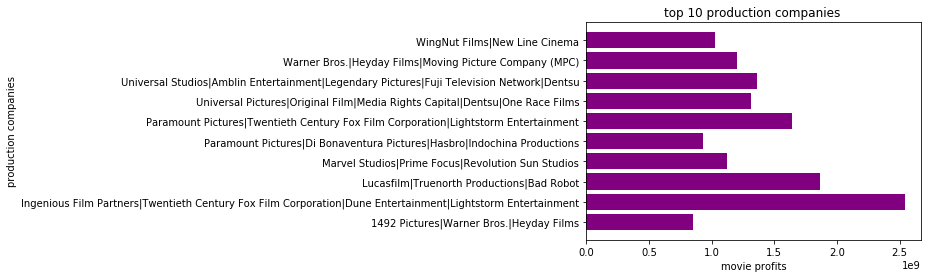

In [52]:
#plotting
plt.barh(sort_comp.index[:10], sort_comp[:10] , color ='purple');
plt.xlabel('movie profits')
plt.ylabel('production companies')
plt.title('top 10 production companies ');




so this tells us that twentieth century fox film corporation is the top production company according to movie profits.


### Question 3 (what are the most common genres over time?)

i noticed the data is seperated by | so we need to split it by making a function that will split the string then return the count of each

In [53]:
def data(column):
    #separate the string by '|'
    genre_data = df[column].str.cat(sep = '|')
    
    genre_data = pd.Series(genre_data.split('|'))
   
    count = genre_data.value_counts(ascending = False)
    
    return count


In [54]:
count = data('genres')


now let's visualize this using pie chart

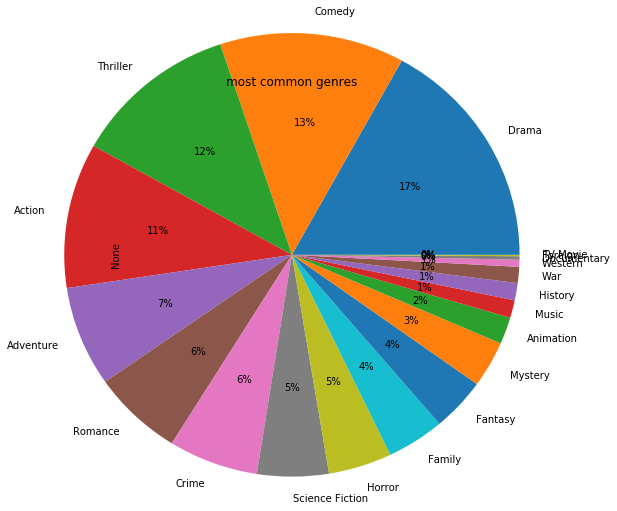

In [55]:
g_plot = count.plot(kind = 'pie', radius = 1.7, figsize = (6,6), autopct = '%0.f%%')
g_plot.set(title = 'most common genres');

as shown in the figure the most common genre with 17% is drama and in second place comedy with 13% then thriller 12% then action 11%..etc

### Question 4 (which attributes associated with runtime?)

ill try to find which variables cause longer movie runtime, first lets count the runtime average

In [56]:
#introducing a function to count average
def avg_fun(column):
    return df[column].mean()


In [57]:
#call function
avg_fun('runtime')

109.35111695137977

the average runtime is approximatly 190 minutes

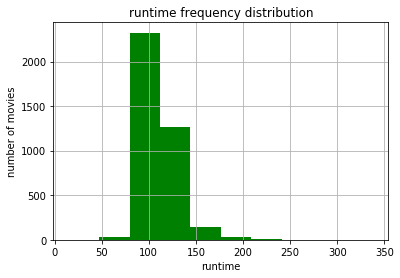

In [69]:
#now to plot
df['runtime'].hist(figsize = (6,4), color = 'green');
plt.xlabel('runtime')
plt.ylabel('number of movies');
plt.title('runtime frequency distribution');

as anticipated from the plot,  we can see most of the movies have a runtime between 90 to 120 mins.

### budget and runtime

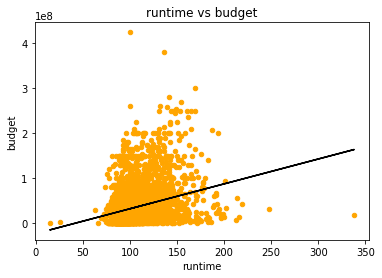

In [70]:
df.plot(x = 'runtime', y= 'budget' , kind = 'scatter', color = 'orange');
plt.plot(df['runtime'], np.poly1d(np.polyfit(df['runtime'], df['budget'], 1))(df['runtime']), color = 'black')
plt.title('runtime vs budget');

the variables have postive correlation meaning that the runtime of the movie is longer when it has higher budget.
to show how much they are assosiated, the line shows that there's respectuflly high correlation therefor high assosiation.

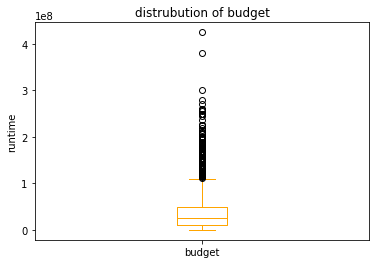

In [60]:
df['budget'].plot(x= ' budget', y = 'runtime', kind = 'box', color = 'orange');
plt.title('distrubution of budget')
plt.ylabel('runtime');

the budget is distrubuted as shown, 75% of the budget is assosiated with higher runtime.

### revenue and runtime

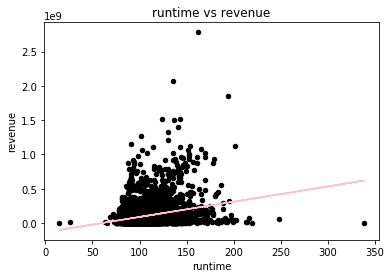

In [71]:
df.plot(x = 'runtime', y= 'revenue' , kind = 'scatter', color = 'black');
plt.plot(df['runtime'], np.poly1d(np.polyfit(df['runtime'], df['revenue'], 1))(df['runtime']), color = 'pink')
plt.title('runtime vs revenue');

here's anothepostive correlation between runtime and revenue of movies, here the assosiation is a little less thatn in the budget case above as the line shows.

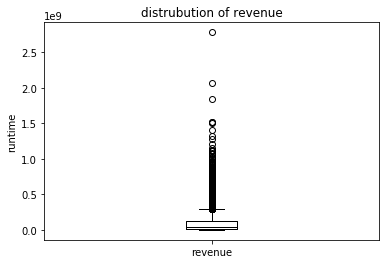

In [62]:
df['revenue'].plot( kind = 'box', color = 'black');
plt.title('distrubution of revenue')
plt.ylabel('runtime');

the revenue is distributed also 75% through a higher runtime but with different minumum, maximum values.

### popularity and runtime

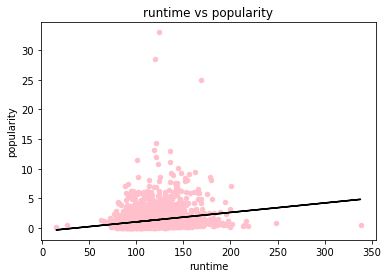

In [72]:
df.plot(x = 'runtime', y= 'popularity' , kind = 'scatter', color = 'pink');

plt.plot(df['runtime'], np.poly1d(np.polyfit(df['runtime'], df['popularity'], 1))(df['runtime']), color = 'black')
plt.title('runtime vs popularity');


runtime and popularity has less positive correlation then budget and revenue with runtime
meaning it has less assosiation as the line shows
we conclude that more popular movies get slightly longer runtime


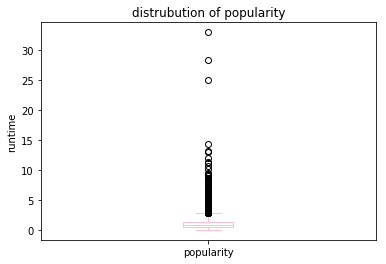

In [64]:
df['popularity'].plot(kind = 'box', color = 'pink');
plt.title('distrubution of popularity')
plt.ylabel('runtime');

since theres less assosiation the popularity distribution is also driven through a higher runtime but with less assosiation

### profits and runtime

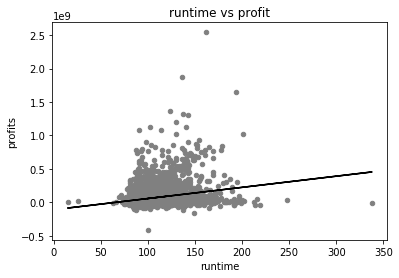

In [73]:
df.plot(x = 'runtime', y= 'profits' , kind = 'scatter', color = 'gray');
plt.plot(df['runtime'], np.poly1d(np.polyfit(df['runtime'], df['profits'], 1))(df['runtime']), color = 'black');
plt.title('runtime vs profit');

there is a higher assosiation between runtime and movie profit the the assosiation between runtime and popularity as the lone shows although the scatter plot shows positive correlation so we conclude that movies with higher profit has longer runtime

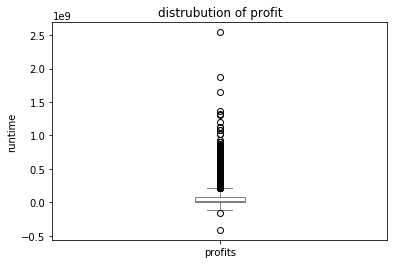

In [66]:
df['profits'].plot(kind = 'box', color = 'gray');
plt.title('distrubution of profit')
plt.ylabel('runtime');

since theres higher assosiation between the profit and runtime than popularity and runtime we can see the difference between the two boxplots where this one has better distrubution according to runtime

seems like all the relations are postively correlated with different levels of colleration but the budget probably has the biggest effect on the runtime

###  Question 4  (what cast has the most movies?)¶)

lets count and see who the top 10 actors are

In [76]:
#use count to see the number of most used actors
count_act = data('cast')
count_act.head(10)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Tom Hanks             34
Sylvester Stallone    34
Morgan Freeman        34
Harrison Ford         34
dtype: int64

<a id='conclusions'></a>
## Conclusions
### Limitations

>This was indeed an intersting journey with this dataset, i personally know now more about how movies are rated and averaged regarding budgets and many other factors affecting the process.

from working on this we can conclude
> ### Q1
'the budget and ratings seems to have almost no association while budget and popularity are highly associated.
>### limitations
the data we worked on is probably not entirely correct or up to date. As mentioned previously the budget and revenue column were not idenftified with a currency unit, it is likely that different currencies exist according to the country of the movie, so there could be some sort of sidaprity that would make the analysis completely wrong. also dropping rows which had missing values could have anegative effect.

>### Q2
The top 10 production companies according to movie profits.
> ### limitations
the profits column was not given but budget and revenue columns existed so i used them to count the profits earned of the movies. 

>### Q3.
As shown in the pichart the most movie genres in this dataset are drama, comedy, thriller and action.
>### limitations
The data in the columns of (Directors, genres, production_companies) are sperated by '|', so a function was needed which takes a column as argument from which data is need to be extracted and keep track of count takeing a given column, and separate the string by '|' .


> ### Q3.
As we saw from the scatter plots, the Revenue increases with increasing of Popularity,That makes them directly proportional.
it's also obvious that the relationship between the ratings vs revenue, and Popularity vs Ratings are rightly-biased
>### limitations 
the issues here were the dropping of null values which could cause an error in the dataset and also the existance of duplicates
which had to be removed

>### Q5.
the top 10 frequent cast in the dataframe .
>### limitations
the dropped null values could have affected the data 
 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])